In [53]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# import os
# print(os.listdir('./data/'))

In [55]:
sign_train = pd.read_csv("./data/sign_mnist_train.csv")
sign_test = pd.read_csv("./data/sign_mnist_test.csv")

In [56]:
sign_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [57]:
sign_test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


In [58]:
#데이터 나누기
x_test = sign_test.iloc[:, 1:].values
y_test = sign_test.iloc[:, 0].values
x_train = sign_train.iloc[:, 1:].values
y_train = sign_train.iloc[:, 0].values

In [59]:
x_test

array([[149, 149, 150, ..., 112, 120, 107],
       [126, 128, 131, ..., 184, 182, 180],
       [ 85,  88,  92, ..., 225, 224, 222],
       ...,
       [190, 191, 190, ..., 211, 209, 208],
       [201, 205, 208, ...,  67,  70,  63],
       [173, 174, 173, ..., 195, 193, 192]], dtype=int64)

In [60]:
y_test

array([ 6,  5, 10, ...,  2,  4,  2], dtype=int64)

In [61]:
x_train

array([[107, 118, 127, ..., 204, 203, 202],
       [155, 157, 156, ..., 103, 135, 149],
       [187, 188, 188, ..., 195, 194, 195],
       ...,
       [174, 174, 174, ..., 202, 200, 200],
       [177, 181, 184, ...,  64,  87,  93],
       [179, 180, 180, ..., 205, 209, 215]], dtype=int64)

In [62]:
y_train

array([ 3,  6,  2, ..., 18, 17, 23], dtype=int64)

c:\Users\y2kjd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


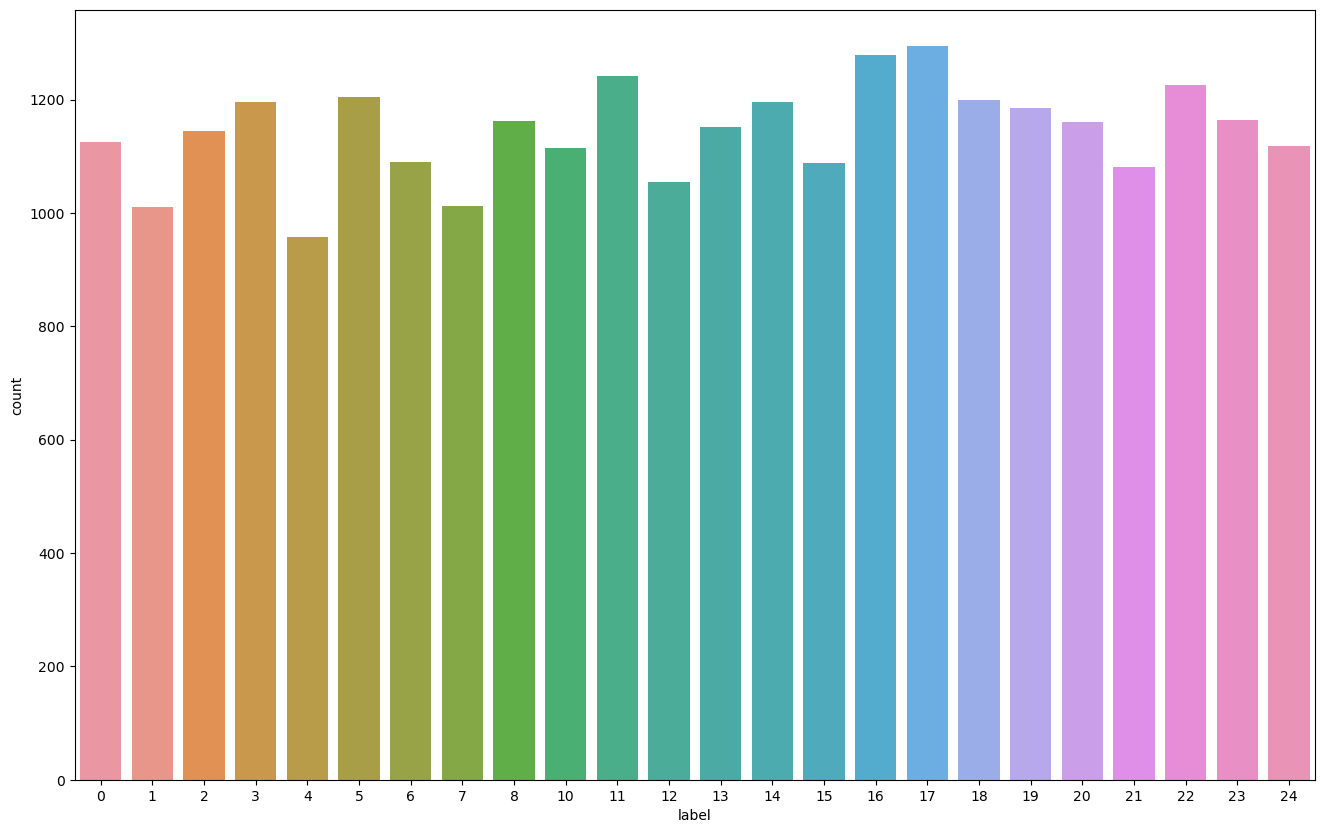

In [63]:
# 카운트플롯으로 데이터 도식 확인하기
# 하나의 라벨에는 얼마만큼의 데이터가 들어있으며 대강의 수치를 파악하는데 사용.
plt.figure(figsize=(16, 10))
sns.countplot(sign_train['label'])
plt.show()

In [64]:
from PIL import Image

#이미지 보기
img = Image.fromarray(x_train[7, :].reshape(28, 28).astype('uint8'))
img.show()

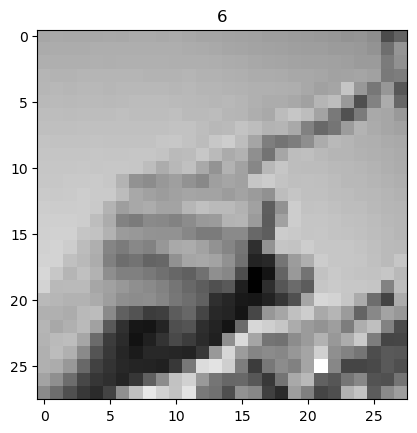

In [65]:
index = 1
plt.title(str(y_train[index]))
plt.imshow(x_train[index].reshape((28, 28)), cmap='gray')
plt.show()

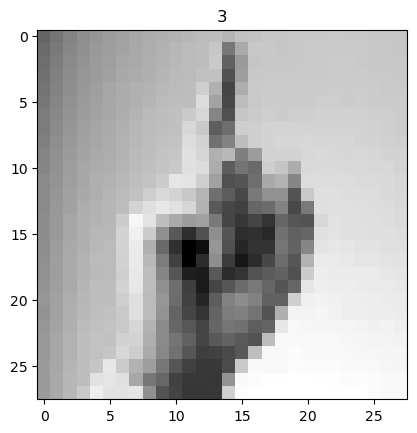

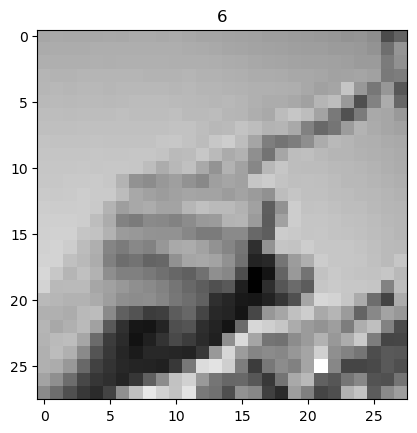

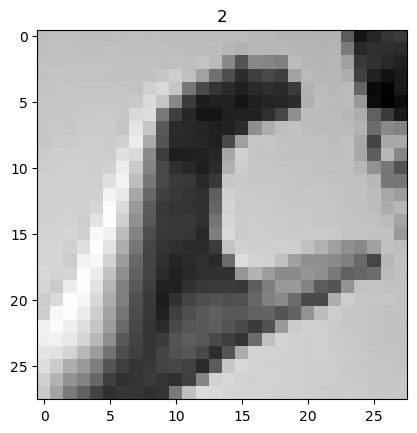

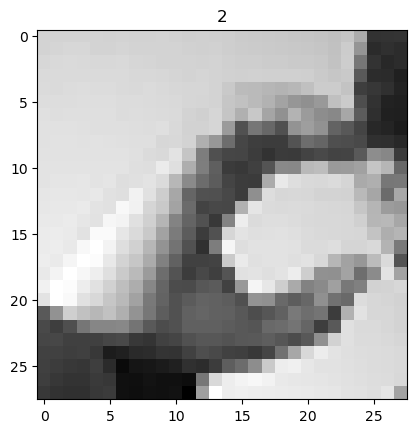

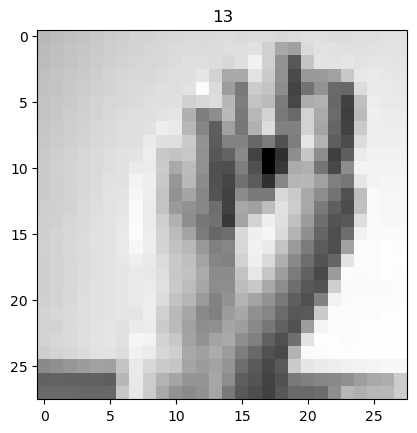

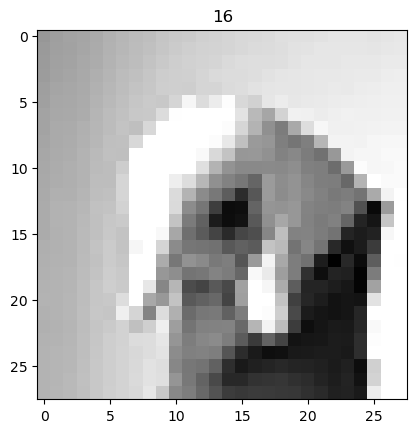

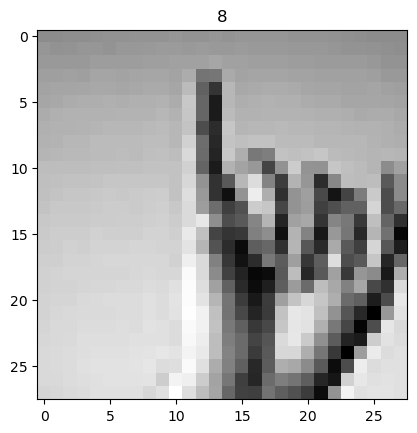

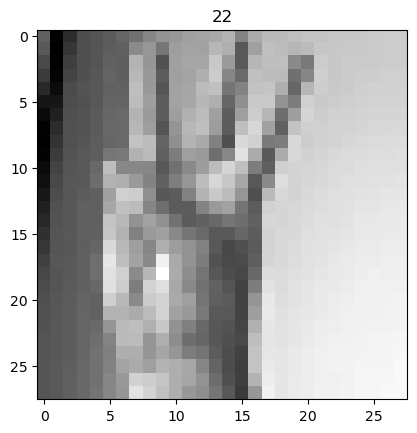

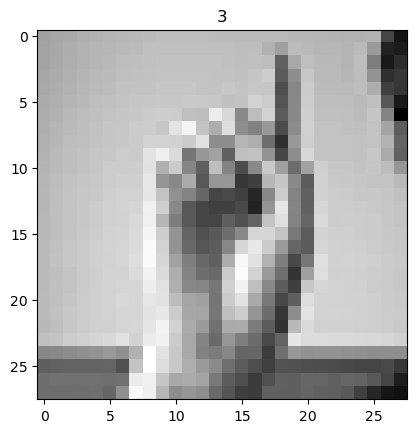

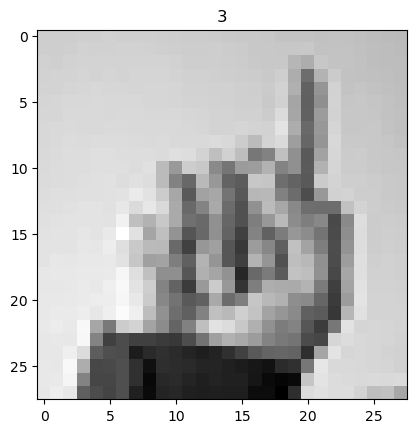

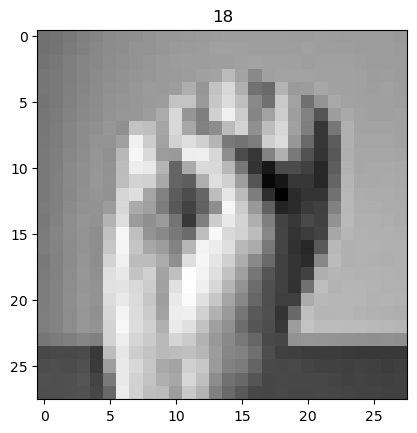

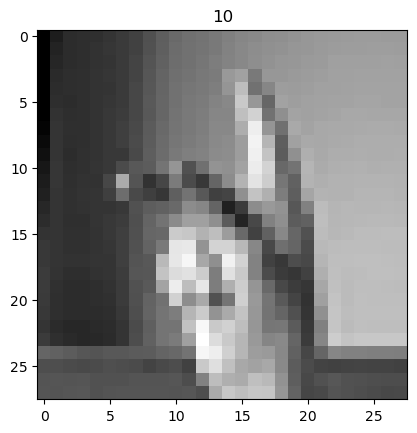

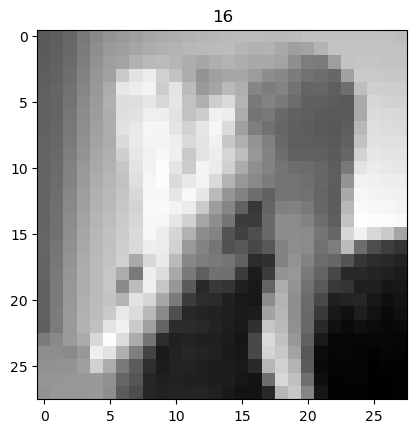

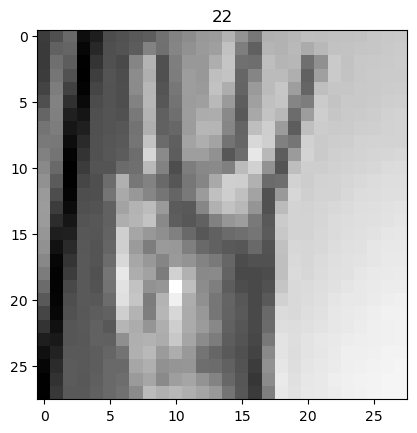

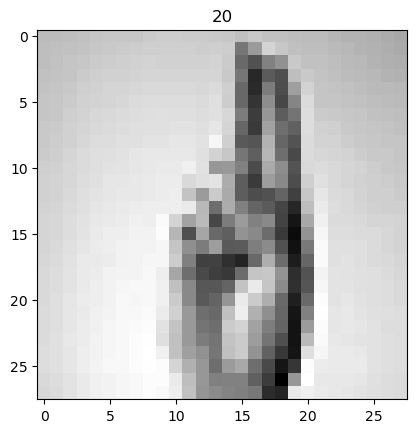

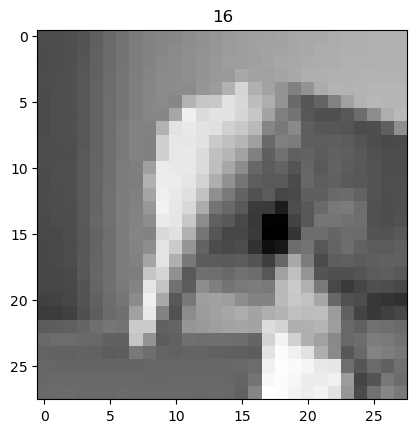

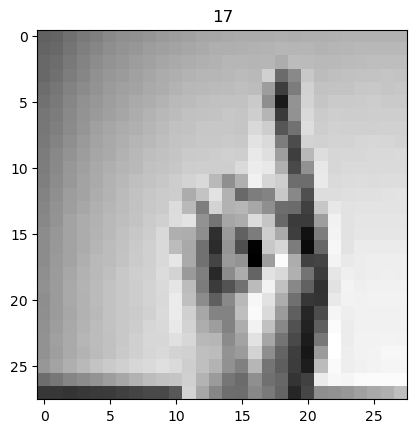

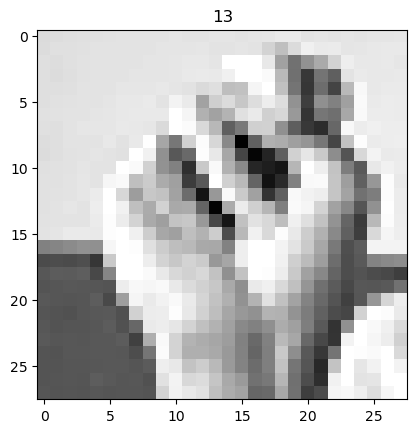

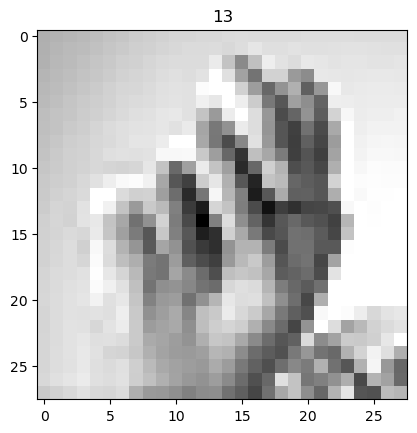

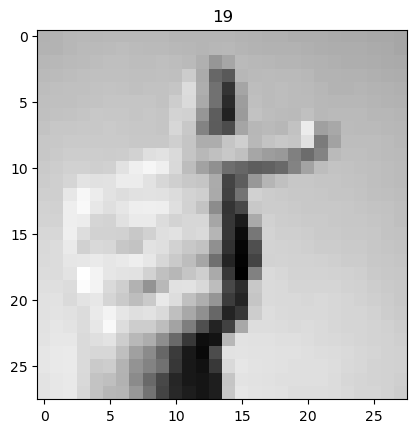

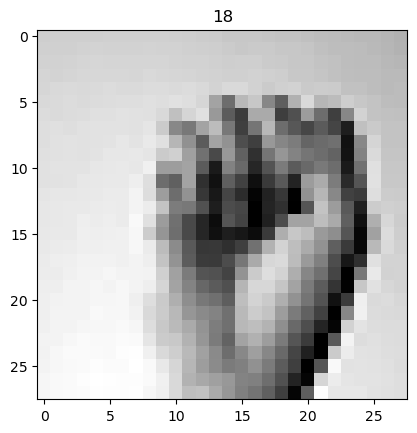

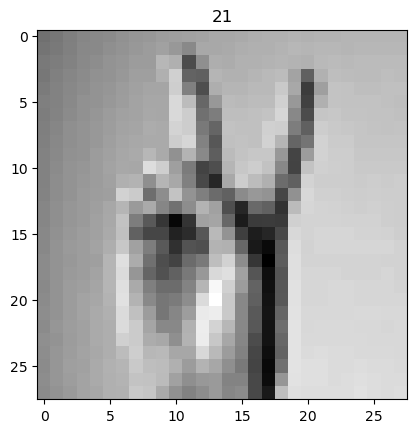

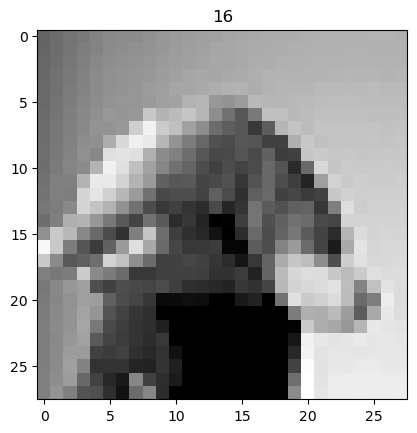

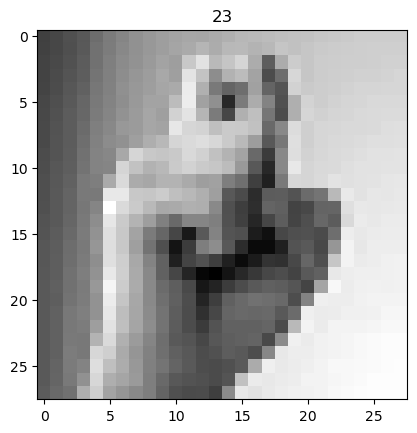

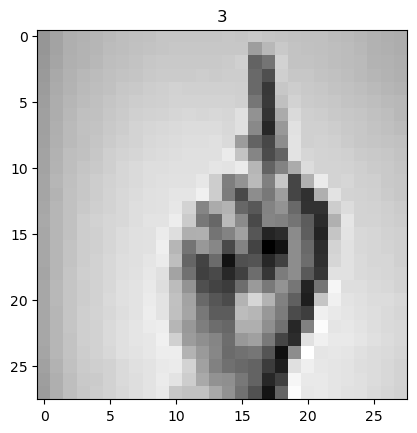

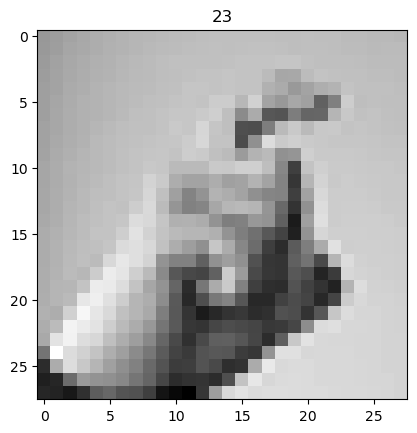

In [66]:
# 학습데이터 x_train 이미지 25개를 출력하는 코드 작성하기

for i in range(26):
    plt.title(str(y_train[i]))
    plt.imshow(x_train[i].reshape((28, 28)), cmap='gray')
    plt.show()

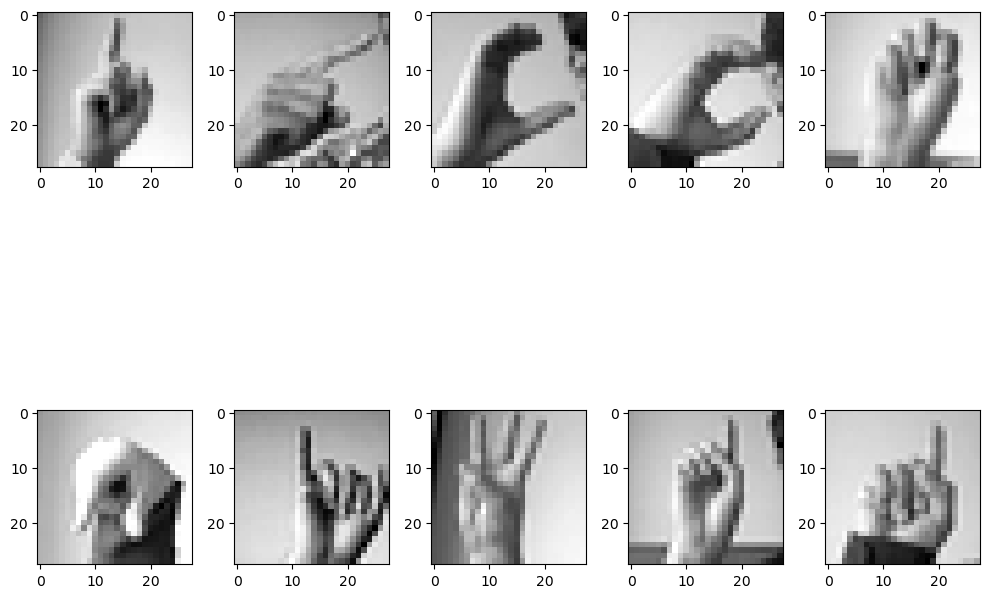

In [67]:
# plt.subplots를 사용하면 이미지를 정렬하여 작은 화면으로 간단하게 확인할 수 있음!

f, ax = plt.subplots(2,5)
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
plt.tight_layout()

In [68]:
#y_train, y_test원핫인코딩
from sklearn.preprocessing import OneHotEncoder
y_train= y_train.reshape(-1,1)
ohe = OneHotEncoder()
y_train = ohe.fit_transform(y_train).toarray()

y_test= y_test.reshape(-1,1)
ohe = OneHotEncoder()
y_test = ohe.fit_transform(y_test).toarray()

In [69]:
#데이터 스케일링
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [70]:
#이미지의 원래 크기에 맞게 데이터 Reshaping
x_train = np.reshape(x_train, (27455, 28, 28, 1))
x_test = np.reshape(x_test, (7172, 28, 28, 1))

In [71]:
#모델 트레이닝을 위한 모듈 불러오기
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
classifier= Sequential()

In [72]:
#Convolution2D, MaxPooling2D
classifier.add(Convolution2D(16, 3,3, input_shape=(x_train.shape[1:]), activation='relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))

In [73]:
#flatten
classifier.add(Flatten())

In [74]:
#층 추가
classifier.add(Dense(units=128, activation="relu"))
classifier.add(Dense(units=24, activation="softmax"))

In [75]:
#모델 컴파일링
classifier.compile(optimizer="adam", loss="categorical_crossentropy", 
                   metrics=["accuracy"])

In [76]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 9, 9, 16)          160       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 24)                3096      
                                                                 
Total params: 36,152
Trainable params: 36,152
Non-trainable params: 0
__________________________________________________

In [77]:
x_train.shape

(27455, 28, 28, 1)

In [78]:
#모델 훈련(배치사이즈 : 10, 에포크 : 3)
classifier.fit(x_train, y_train, batch_size = 10, epochs = 3)

Epoch 1/3
2746/2746 [==============================] - 5s 1ms/step - loss: 0.6784 - accuracy: 0.7994
Epoch 2/3
2746/2746 [==============================] - 4s 1ms/step - loss: 0.0711 - accuracy: 0.9832
Epoch 3/3
2746/2746 [==============================] - 4s 1ms/step - loss: 0.0304 - accuracy: 0.9932


In [79]:
#데이터 예측
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

225/225 [==============================] - 0s 1ms/step


In [80]:
#모델 정확도 출력
count = 0
for i in range(0, y_pred.shape[0]):
    for j in range(0, y_pred.shape[1]):
        if y_pred[i][j] == y_test[i][j]:
            count = count+1
        else:
            continue    
#print(count) 
print("Accurancy: "+str(count/(7172*24)))

Accurancy: 0.9846858152072876


In [81]:
from PIL import Image 

In [82]:
x_img=Image.open('./data//Y.jpg')

In [83]:
x_img.size

(4000, 3000)

In [84]:
x_img=x_img.resize((28,28))

In [85]:
x_img=x_img.convert('L')

In [86]:
x_img=x_img.rotate(angle=-90)

In [87]:
x_img

In [88]:
x_array=np.array(x_img)

In [89]:
x_img.close()

In [90]:
x_array.shape

(28, 28)

In [91]:
x_array= x_array.reshape(1,28,28,1)

In [92]:
result=classifier.predict(x_array)

1/1 [==============================] - 0s 45ms/step


In [93]:
result.shape

(1, 24)

In [94]:
result

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [95]:
result.argmax(-1)

array([7], dtype=int64)

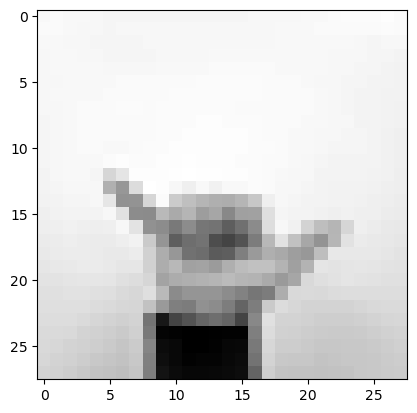

In [96]:
plt.imshow(x_array.reshape(28,28,1),cmap='gray')

In [97]:
x_train

array([[[[-0.92895113],
         [-0.76362507],
         [-0.62085156],
         ...,
         [ 0.18596777],
         [ 0.22412486],
         [ 0.20920973]],

        [[-0.86986267],
         [-0.73040387],
         [-0.60725602],
         ...,
         [ 0.16712865],
         [ 0.20377044],
         [ 0.19132411]],

        [[-0.86207219],
         [-0.72652414],
         [-0.59773141],
         ...,
         [ 0.12087614],
         [ 0.15203008],
         [ 0.17601611]],

        ...,

        [[-0.17378307],
         [-0.05472484],
         [ 0.08950709],
         ...,
         [ 0.56635514],
         [ 0.5579637 ],
         [ 0.55567121]],

        [[-0.0948255 ],
         [ 0.04943618],
         [ 0.18714237],
         ...,
         [ 0.62652884],
         [ 0.62296393],
         [ 0.61714998]],

        [[-0.02587547],
         [ 0.12692517],
         [ 0.26116785],
         ...,
         [ 0.66406257],
         [ 0.65811336],
         [ 0.65493948]]],


       [[[ 0.23165213],


In [98]:
df = pd.read_csv('./data/sign_mnist_train.csv')

In [99]:
sample = df[df['label']==0]

In [100]:
len(sample)

1126

In [101]:
sample_array = sample.iloc[0,1:].values

In [102]:
sample_array = sample_array.reshape(28,28,1)

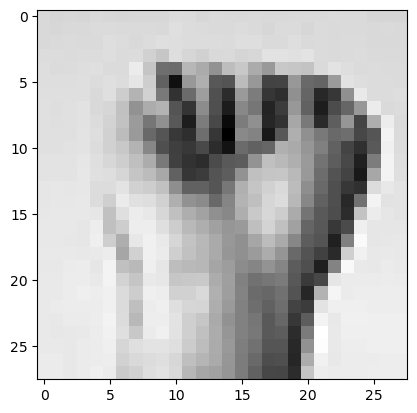

In [103]:
plt.imshow(sample_array,cmap='gray')